In [3]:
import numpy as np 
import pandas as pd 

import os
print(os.listdir("C:\\Users\\INTEL\\Documents\\kaggle 97%\\cell-images-for-detecting-malaria\\cell_images"))

['Parasitized', 'Uninfected']


In [4]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

Using TensorFlow backend.


In [5]:
parasitized_data = os.listdir('C:\\Users\\INTEL\\Documents\\kaggle 97%\\cell-images-for-detecting-malaria\\cell_images\\Parasitized')
print(parasitized_data[:10])

uninfected_data = os.listdir('C:\\Users\\INTEL\\Documents\\kaggle 97%\\cell-images-for-detecting-malaria\\cell_images\\Uninfected')
print('\n')
print(uninfected_data[:10])

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png']


['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png', 'C100P61ThinF_IMG_20150918_144104_cell_34.png', 'C100P61ThinF_IMG_20150918_144104_cell_48.png', 'C100P61ThinF_IMG_20150918_144104_cell_65.png', 'C100P61ThinF_IMG_20150918_144348_cell_108.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png']


**1. PARASITIZED DATA**

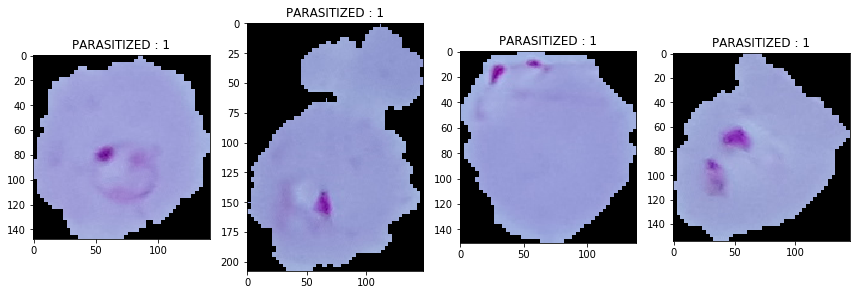

In [6]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:\\Users\\INTEL\\Documents\\kaggle 97%\\cell-images-for-detecting-malaria\\cell_images\\Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

**2. UNINFECTTED DATA**

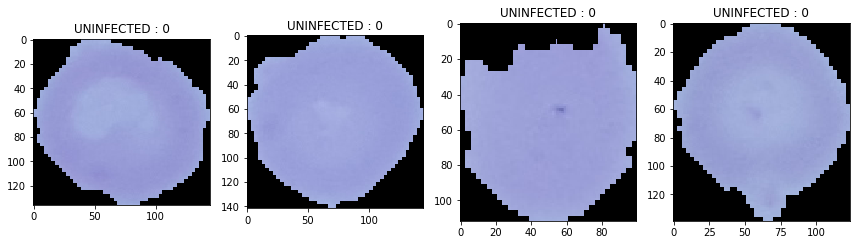

In [7]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:\\Users\\INTEL\\Documents\\kaggle 97%\\cell-images-for-detecting-malaria\\cell_images\\Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

**One can clearly see the difference between the infected and uninfected. You can observe a small clot inside the cellular image for infected while for the uninfected the cellular image is clean without any clots.**

In [8]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('C:\\Users\\INTEL\\Documents\\kaggle 97%\\cell-images-for-detecting-malaria\\cell_images\\Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('C:\\Users\\INTEL\\Documents\\kaggle 97%\\cell-images-for-detecting-malaria\\cell_images\\Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

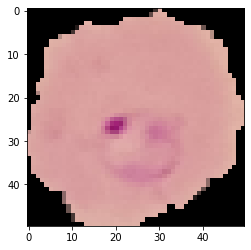

In [9]:
plt.imshow(data[0])
plt.show()

In [10]:
image_data = np.array(data)
labels = np.array(labels)

In [11]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [13]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [14]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


***BUILDING THE CNN MODEL**

In [15]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [16]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [17]:
#instantiate the model
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxP

In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [19]:
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
22046/22046 [==============================] - 298s 14ms/step - loss: 0.6015 - acc: 0.7336
Epoch 2/20
22046/22046 [==============================] - 285s 13ms/step - loss: 0.2373 - acc: 0.9120
Epoch 3/20
22046/22046 [==============================] - 285s 13ms/step - loss: 0.1884 - acc: 0.9347
Epoch 4/20
22046/22046 [==============================] - 239s 11ms/step - loss: 0.1685 - acc: 0.9426
Epoch 5/20
22046/22046 [==============================] - 208s 9ms/step - loss: 0.1635 - acc: 0.9465
Epoch 6/20
22046/22046 [==============================] - 195s 9ms/step - loss: 0.1577 - acc: 0.9483
Epoch 7/20
22046/22046 [==============================] - 203s 9ms/step - loss: 0.1583 - acc: 0.9465
Epoch 8/20
22046/22046 [==============================] - 187s 8ms/step - loss: 0.1527 - acc: 0.9507
Epoch 9/20
22046/22046 [==============================] - 185s 8ms/step - loss: 0.1511 - acc: 0.9508
Epoch 10/20
22046/22046 [==============

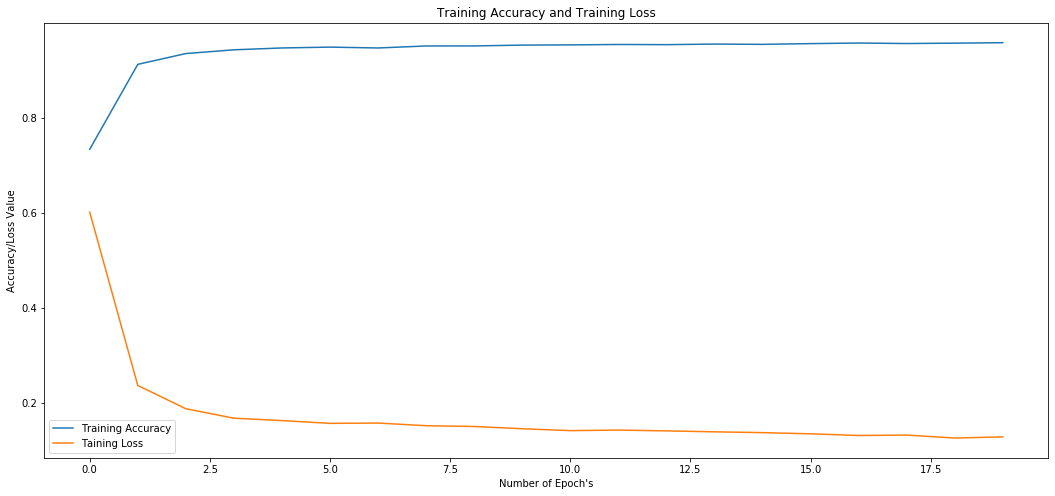

In [20]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['acc'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

# ax2.plot(range(20), h.history['loss'], label = 'Training Loss')
# ax2.plot(range(20), h.history['val_loss'], label = 'Validation Loss')
# #ax2.set_xticks(np.arange(0, 31, 5))
# ax2.set_xlabel("Number of Epoch's")
# ax2.set_ylabel('Loss Value')
# ax2.set_title('Training Loss vs Validation Loss')
# ax2.legend(loc = "best")

In [21]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test)
model.save("model_malariaaa.h5")

5512/5512 [==============================] - 16s 3ms/step


In [22]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.1355992129615931
ACCURACY : 0.9548258345428157



**The performance of the model on the test data seems to fairly good with 95.48% accuracy.**